#### 1. Load the data into Data Frame:
I sourced the news articles on US states tax law changes from an internal product. There are 1856 news articles 50 US states. News articles are stored in JSON format. Iterate through articles JSON file and load State, Topic, Article title and article snippet to data frame. 

In [2]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the JSON file
# Define the folder path
folder_path = '/Users/a0122712/tri/articles/'

# Iterate over the files in the folder

# Create an empty dataframe
df = pd.DataFrame(columns=['Guid', 'State Code', 'Topic','Title', 'Summary Text'])

# Iterate over the files in the folder
data_list = []
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        guid = filename.split('.')[0]
        # Read the JSON file
        with open(os.path.join(folder_path, filename)) as file:
            data = json.load(file)

        # Extract the required fields
        if 'Metadata' in data:
            state_code = data['Metadata']['States'][0]['StateCode']
            topic= data['Metadata']['Topics'][0]['TopicName']
            title = data['Article']['Title']
            summary_text = data['Article']['SummaryText']
        else:
            state_code = data['states'][0]['value']
            topic= data['taxtype'][0]['value']
            title = data['title']
            summary_text = data['text']
        # Add the extracted fields to the dataframe
        data_list.append({'Guid': guid, 'State Code': state_code, 'Topic':topic, 'Title': title, 'Summary Text': summary_text})

df = pd.DataFrame(data_list)

# Print the dataframe
print(df)
# Extract the required fields
     



                                   Guid State Code  \
0     Idb91b15cee8744a3a08d5668ddd2d692         WA   
1     I855a629dbdb54e59869a14ae9232f2ec         WA   
2     I42d2ac91a02f49718dc2a5269924d087         OR   
3     I70fcf76573b54415ba9037dec1fcb838         NC   
4     I88918939493e4d88af0b6431ef855821         OR   
...                                 ...        ...   
1851  I12833c3c3e1245c1938cc3e35437768c         IA   
1852  I93e91c48c9f640d994876acf9c0ec1aa         AL   
1853  I39ee51a0452f45baadf551de962fdd7c         VT   
1854  I864451ebc13849418de0a6707fd3ec09         WI   
1855  Id5868ac7aad44e38995901d19bd9d710         MA   

                                         Topic  \
0                                 Property Tax   
1                  Business and Occupation Tax   
2                         Corporate Income Tax   
3                         Public Utilities Tax   
4     State Corporate Income & Franchise Taxes   
...                                        ...   
1

#### Do a box plot of word count of articles

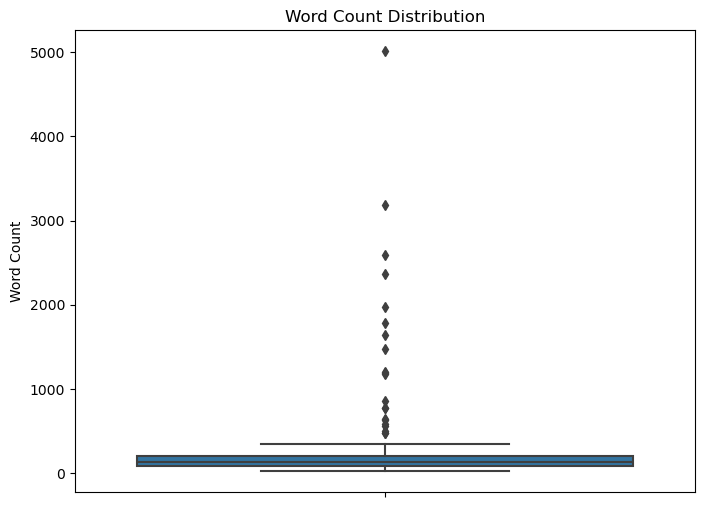

In [22]:
# Calculate word count for each summary text
df['Word Count'] = df['Summary Text'].apply(lambda x: len(x.split()))

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Word Count')
plt.title('Word Count Distribution')
plt.ylabel('Word Count')
plt.show()

#### 1.1 Find distribution of news articles across states

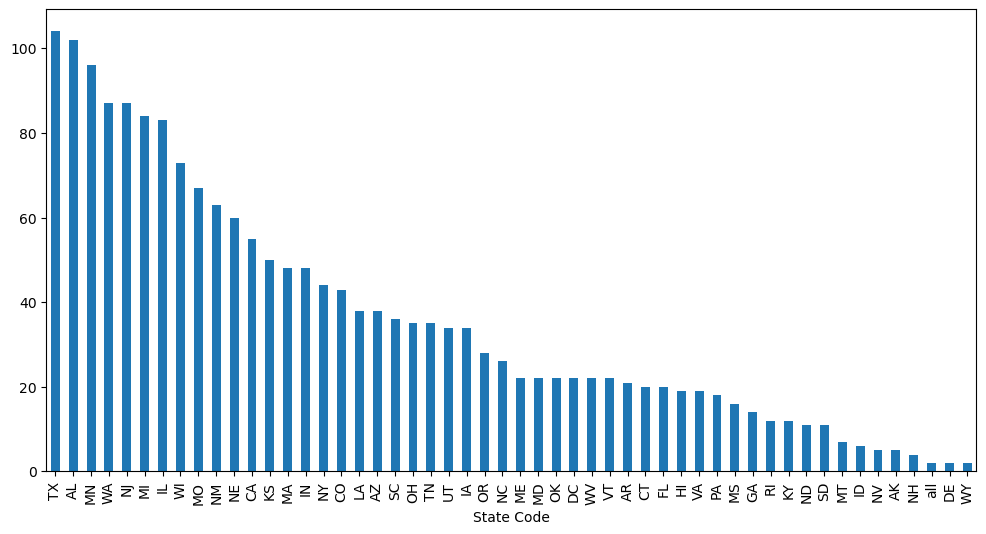

In [12]:


plt.figure(figsize=(12, 6))  # Set the figure size to increase the width
df['State Code'].value_counts().plot(kind='bar')
plt.show()

#### 1.2 Find distribution of articles across Tax Topics

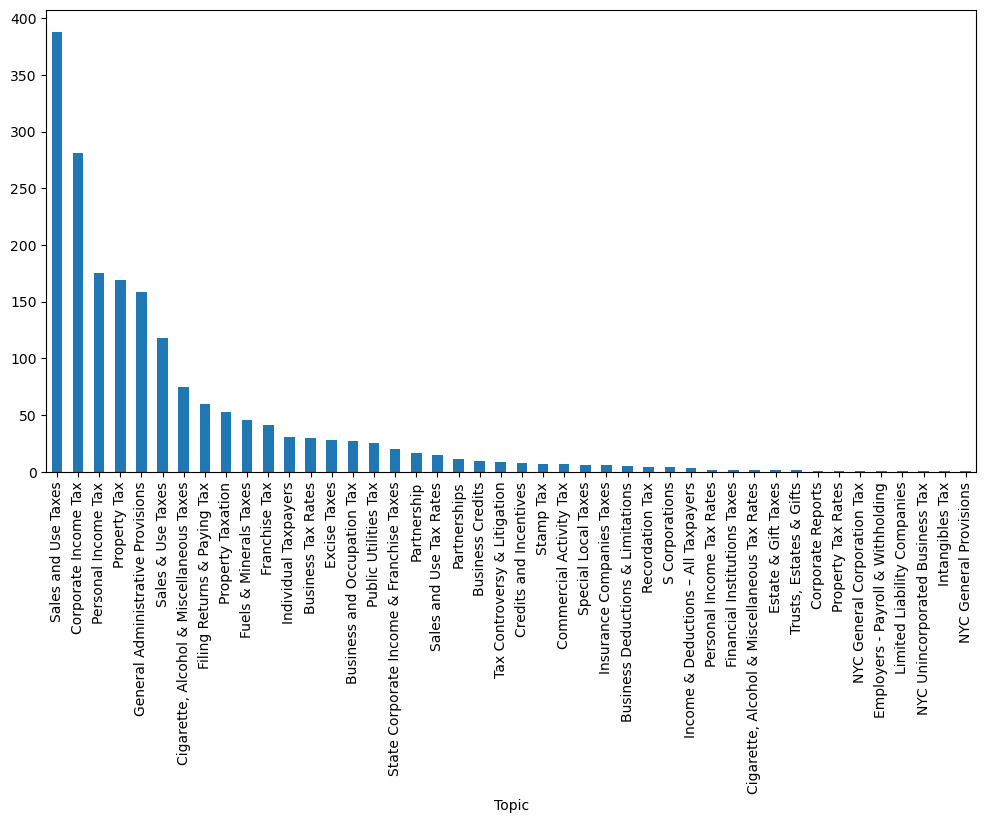

In [13]:
plt.figure(figsize=(12, 6))  # Set the figure size to increase the width
df['Topic'].value_counts().plot(kind='bar')
plt.show()

#### 1.3 Distribution of articles per state per Topic

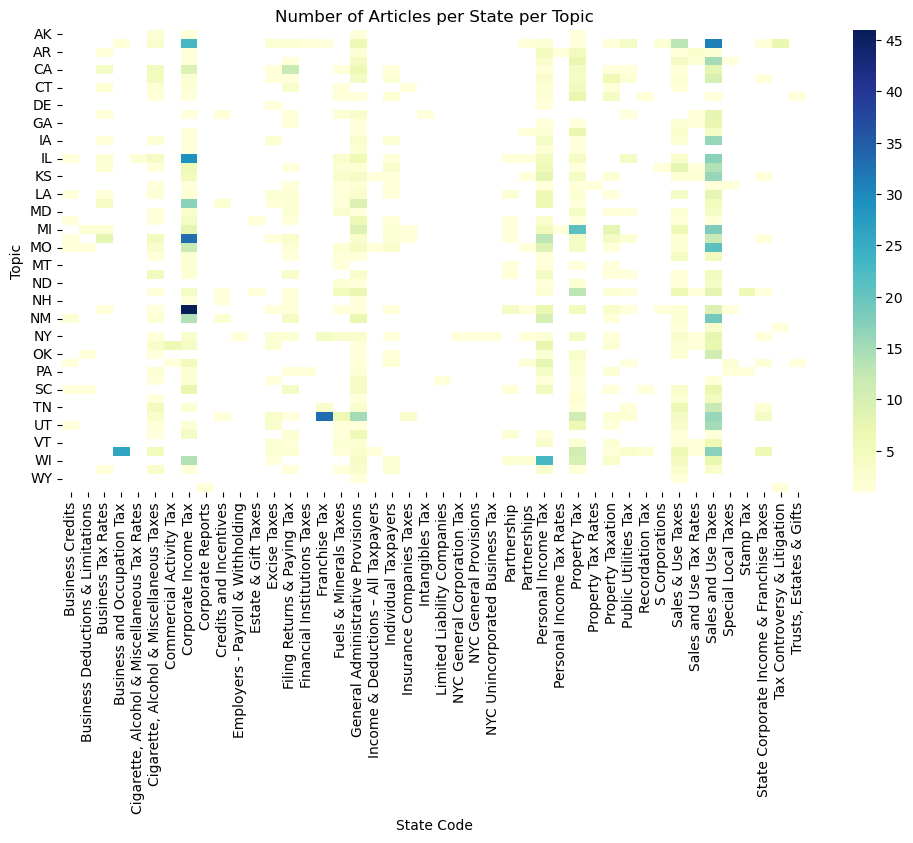

In [14]:


plt.figure(figsize=(12, 6))  # Set the figure size to increase the width
sns.heatmap(df.groupby(['State Code', 'Topic']).size().unstack(), cmap='YlGnBu')
plt.xlabel('State Code')
plt.ylabel('Topic')
plt.title('Number of Articles per State per Topic')
plt.show()

#### 1.4 Filter Corporat Income Tax ralated articles and find the distribution

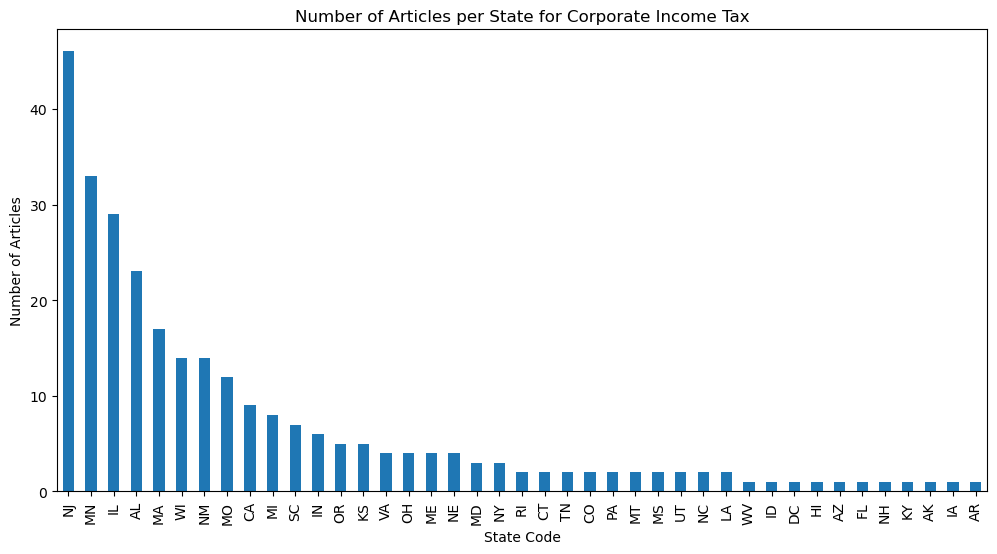

In [15]:
plt.figure(figsize=(12, 6))  # Set the figure size to increase the width
df[df['Topic'] == 'Corporate Income Tax']['State Code'].value_counts().plot(kind='bar')
plt.xlabel('State Code')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per State for Corporate Income Tax')
plt.show()

I narrowed down the following 6 states for this exercise. I generated summarized descriptions for each tax form from these states based on tax form filing instructions and line descriptions within each form.

In [9]:
state_codes = ["AL", "IL", "MA" ,"MN", "NJ", "TX"]

### 2. Load labelled news articles to a dataframe. 
I worked with a tax analysts (subject matter expert) to label 220 news articles asking them to predict the tax forms impacted by a particular news article for these 6 states. 

In [3]:
annotations_data=[]
with open('/Users/a0122712/tri/annotations1.json') as file:
    json_data = json.load(file)
for state, articles in json_data.items():
    for article_id, form_data in articles.items():
        form_names=[]
        for item in form_data:
            form_names.append(item["name"])
        annotations_data.append({"guid": article_id, "form_names": form_names})

with open('/Users/a0122712/tri/annotations2.json') as file:
    json_data = json.load(file)
for state, articles in json_data.items():
    for article_id, form_data in articles.items():
        form_names=[]
        for item in form_data:
            form_names.append(item["name"])
        annotations_data.append({"guid": article_id, "form_names": form_names})

# Create a DataFrame from the list of dictionaries
df_annotations = pd.DataFrame(annotations_data)
print(df_annotations)

                                  guid  \
0    I029cf82b0d66499ab48a88c08e1c2639   
1    I14b1097f21bf44a6bd591aa81e80154c   
2    I26ad2975070642ebba1a7fd3805df218   
3    I31e660a655b844fa8b3ad8e5494941df   
4    I4c40b669be314ff3a949b5a02d614222   
..                                 ...   
215  Id12c176b19dc434ca4cff98b146969db   
216  Id1e1236770d1e1236770d1e1236770d1   
217  If74e133a7f3e4453b148f656a0f1d9dc   
218  If85957bdf5c143b8abc6d8ad098872bb   
219   Itxins202390f84c69647e4ea0abaebd   

                                            form_names  
0                                  [Sch20cBC, SchEPTC]  
1                                  [FormET1, FormET1C]  
2                           [Form65, FormEPT, Form20S]  
3                                 [Sch20cBC, SchET1EC]  
4                 [Sch20cBC, Form20S, Form65, Form20C]  
..                                                 ...  
215  [FranchiseTaxForm05-160, FranchiseTaxForm05-16...  
216  [FranchiseTaxForm05-160, Franchise

In [11]:
#Filter the articles in the dataset based on the articles that have annotations
filtered_df = df[df['Guid'].isin(df_annotations['guid'])]
df=filtered_df

### 3. Load Short description of tax forms from the chosen 6 states

In [4]:
with open('/Users/a0122712/tri/form_descriptions.json') as file:
    descriptions = json.load(file)

def preprocess_dict(data):
    processed_data = {}
    for key, value in data.items():
        processed_data[key] = process_text(value)
    return processed_data

### 4. Use TF-IDF to find similarities between news articles and a short description of tax forms.

In [5]:
from typing import List, Tuple
import re

import nltk
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize as tokenizer

nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, fbeta_score



[nltk_data] Downloading package punkt to /Users/a0122712/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a0122712/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4.1 Define functions for normalize, tokenize and remove stop words

In [6]:
def tokenize(txt: str):
    """
    Tokenizes the given text.

    Args:
        txt (str): The text to be tokenized.

    Returns:
        List[str]: A list of tokens.

    """
    return tokenizer(txt)

def remove_stopwords(tokenized_text: List[str]) -> List[str]:
    """
    Removes stopwords from the tokenized text.

    Args:
        tokenized_text (List[str]): The tokenized text.

    Returns:
        List[str]: The tokenized text without stopwords.

    """
    return [t for t in tokenized_text if t not in stopwords.words("english")]

def text_normalization(
    txt: str,
    to_lower: bool = True,
    no_punct: bool = True,
    strip: bool = True,
    no_newline: bool = True,
    remove_misc: bool = True,
) -> str:
    """
    Performs text normalization.

    Args:
        txt (str): The text to be normalized.
        to_lower (bool): Whether to convert the text to lowercase (optional).
        no_punct (bool): Whether to remove punctuation from the text (optional).
        strip (bool): Whether to strip leading and trailing whitespaces from the text (optional).
        no_newline (bool): Whether to remove newline characters from the text (optional).
        remove_misc (bool): Whether to remove miscellaneous characters from the text (optional).

    Returns:
        str: The normalized text.

    """
    if no_punct:
        txt = re.sub(r"(^\(?[^()]*\))|([^a-zA-Z0-9\s]+)", "", txt)
        txt = re.sub(r"[^\S]+", " ", txt)
    if strip:
        txt = txt.strip()
    if to_lower:
        txt = txt.lower()
    if remove_misc:
        cleanr = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
        txt = re.sub(cleanr, "", txt)
    if no_newline:
        txt = txt.replace("\n", " ")
    return txt

def process_text(txt: str, ngram_range: tuple = (1, 2)) -> List[str]:
    """
    Processes the given text.

    Args:
        txt (str): The text to be processed.
        ngram_range (tuple): The range of n-grams to generate (optional).

    Returns:
        List[str]: A list of processed tokens.

    """
    normalized_text = text_normalization(txt)
    tokenized_text = tokenize(normalized_text)
    tokenized_text_no_stop_words = remove_stopwords(tokenized_text)
    text = ' '.join(tokenized_text_no_stop_words)
    
    return text

#### 4.2 Define the function for vectorizing tax form description and news articles and finding cosine similarity between them

In [7]:
def tf_idf(form_descriptions_corpus, articles_corpus):
    
    available_forms = list(form_descriptions_corpus.keys())
    form_descriptions = list(form_descriptions_corpus.values())
    article_ids = list(articles_corpus.keys())
    article_texts = list(articles_corpus.values())
    
    vectorizer = TfidfVectorizer(ngram_range = (1,2), stop_words = 'english')
    tfidf_matrix_forms = vectorizer.fit_transform(form_descriptions)
    tfidf_matrix_articles = vectorizer.transform(article_texts)
    similarity_matrix = cosine_similarity(tfidf_matrix_articles, tfidf_matrix_forms)
        
    for idx, article_id in enumerate(article_ids):
        similarity_scores = similarity_matrix[idx]
        form_score_tuples = [(available_forms[i], similarity_scores[i]) for i in range(len(available_forms))]

    return form_score_tuples

#### 4.3 Perform similarity matching between between form description and new articles using TF-Idf

In [ ]:
predictions = dict()
i=0
for state_code in state_codes:
    print("Processing state code: ", state_code)
    
    documents = descriptions[state_code]
    processed_docs = preprocess_dict(documents)

    predictions[state_code] = dict()
    articles_corpus = dict()

    for index, row in df[df['State Code']==state_code].iterrows():
        i=i+1
        article_guid = row['Guid']
        article_text = row['Summary Text']
        articles_corpus[article_guid] = process_text(article_text)
        predictions_tmp = tf_idf(processed_docs, articles_corpus)
        predictions[state_code][article_guid] = predictions_tmp
    

#### 4.4 Convert the predicted values into a dataframe based on a threshold score for similarity matching
The result of TF-Idf is a score for each tax form based on the similarity between short description of a tax form and the news article. I want to select anything that has similarity score of more than 0.1

In [19]:

predictions_data = []

for state, forms in predictions.items():
    for guid, form_scores in forms.items():
        high_score_forms = [form for (form, score) in form_scores if score > 0.1]
        predictions_data.append({'guid': guid, 'form_names': high_score_forms})
df_preds= pd.DataFrame(predictions_data)


#### 4.5 Evaluate the results

In [21]:
df_merged = pd.merge(df_preds, df_annotations, on='guid', suffixes=('_pred', '_true'))

# Initialize counters
TP_total = 0
FP_total = 0
FN_total = 0

# Iterate over each row
for index, row in df_merged.iterrows():
    # Convert form names to sets for set operations
    pred_set = set(row['form_names_pred'])
    true_set = set(row['form_names_true'])
    
    # True Positives (Correct predictions)
    TP = len(pred_set & true_set)
    
    # False Positives (Incorrect predictions)
    FP = len(pred_set - true_set)
    
    # False Negatives (Missed true forms)
    FN = len(true_set - pred_set)
    
    # Update totals
    TP_total += TP
    FP_total += FP
    FN_total += FN

# Calculate precision
if (TP_total + FP_total) > 0:
    precision = TP_total / (TP_total + FP_total)
else:
    precision = 0

# Calculate recall
if (TP_total + FN_total) > 0:
    recall = TP_total / (TP_total + FN_total)
else:
    recall = 0

# Calculate F2 Score
beta = 2
if (precision + recall) > 0:
    F2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
else:
    F2 = 0

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F2 Score: {F2:.4f}')

Precision: 0.2836
Recall: 0.4849
F2 Score: 0.4246
